In [1]:
# Parameters
SAMPLES = "Broad_mito_1,VIB_Hydrop_1,Broad_mito_2,VIB_Hydrop_2,Broad_1,Sanger_1,Broad_2,CNAG_1,Stanford_2,Stanford_1,CNAG_2,s3atac,VIB_2,VIB_1,Sanger_2,VIB_Hydrop_1,VIB_Hydrop_2"
METADATAPKL = "out_qc_merged/data/pycistopic/qc/metadata_bc_dict.pkl"
PROFDATAPKL = "out_qc_merged/data/pycistopic/qc/profile_data_dict.pkl"
WORKFLOW_PARAMETERS = "{\"container\":\"/staging/leuven/stg_00002/lcb/cflerin/containers/aertslab-pycistopic-latest.sif\",\"biomart_annot\":{\"biomart_dataset_name\":\"hsapiens_gene_ensembl\",\"biomart_host\":\"http://www.ensembl.org\"},\"macs2_call_peaks\":{\"gsize\":\"hs\",\"qvalue\":0.01,\"extsize\":146,\"shift\":73,\"keepdup\":\"all\"},\"compute_qc_stats\":{\"n_frag\":100,\"tss_flank_window\":2000,\"tss_window\":50,\"tss_minimum_signal_window\":100,\"tss_rolling_window\":10,\"min_norm\":0.1},\"call_cells\":{\"report_ipynb\":\"/src/pycistopic/bin/pycisTopic_qc_report_template.ipynb\",\"use_density_coloring_on_scatterplot\":true,\"use_detailed_title_on_scatterplot\":true,\"filter_frags_lower\":{\"Broad_1\":3000,\"Broad_2\":3000,\"Broad_mito_1\":3500,\"Broad_mito_2\":3500,\"CNAG_1\":2000,\"CNAG_2\":2500,\"Sanger_1\":7000,\"Sanger_2\":7000,\"VIB_1\":3500,\"VIB_2\":3500,\"Stanford_1\":7000,\"Stanford_2\":4000,\"atac_pbmc_5k_v1\":3000,\"atac_pbmc_5k_nextgem\":3000,\"pbmc_unsorted_3k\":2000,\"s3atac\":10000,\"VIB_Hydrop_1\":,\"VIB_Hydrop_2\":1000},\"filter_tss_lower\":{\"Broad_1\":17,\"Broad_2\":17,\"Broad_mito_1\":12,\"Broad_mito_2\":12,\"CNAG_1\":13,\"CNAG_2\":13,\"Sanger_1\":10,\"Sanger_2\":10,\"VIB_1\":16,\"VIB_2\":13,\"Stanford_1\":10,\"Stanford_2\":10,\"atac_pbmc_5k_v1\":16,\"atac_pbmc_5k_nextgem\":16,\"pbmc_unsorted_3k\":15,\"s3atac\":4,\"VIB_Hydrop_1\":15,\"VIB_Hydrop_2\":15},\"filter_frags_upper\":\"\",\"filter_tss_upper\":\"\",\"filter_frip_lower\":\"\",\"filter_frip_upper\":\"\",\"filter_dup_rate_lower\":\"\",\"filter_dup_rate_upper\":\"\"}}"
WORKFLOW_PARAMETERS = "{\"container\":\"/staging/leuven/stg_00002/lcb/cflerin/containers/aertslab-pycistopic-latest.sif\",\"biomart_annot\":{\"biomart_dataset_name\":\"hsapiens_gene_ensembl\",\"biomart_host\":\"http://www.ensembl.org\"},\"macs2_call_peaks\":{\"gsize\":\"hs\",\"qvalue\":0.01,\"extsize\":146,\"shift\":73,\"keepdup\":\"all\"},\"compute_qc_stats\":{\"n_frag\":100,\"tss_flank_window\":2000,\"tss_window\":50,\"tss_minimum_signal_window\":100,\"tss_rolling_window\":10,\"min_norm\":0.1},\"call_cells\":{\"report_ipynb\":\"/src/pycistopic/bin/pycisTopic_qc_report_template.ipynb\",\"use_density_coloring_on_scatterplot\":true,\"use_detailed_title_on_scatterplot\":true,\"filter_frags_lower\":{\"Broad_1\":3000,\"Broad_2\":3000,\"Broad_mito_1\":3500,\"Broad_mito_2\":3500,\"CNAG_1\":1500,\"CNAG_2\":2000,\"Sanger_1\":3000,\"Sanger_2\":3000,\"VIB_1\":2000,\"VIB_2\":3500,\"Stanford_1\":2000,\"Stanford_2\":2000,\"atac_pbmc_5k_v1\":3000,\"atac_pbmc_5k_nextgem\":3000,\"pbmc_unsorted_3k\":2000,\"s3atac\":1500,\"VIB_Hydrop_1\":900,\"VIB_Hydrop_2\":900},\"filter_tss_lower\":{\"Broad_1\":17,\"Broad_2\":17,\"Broad_mito_1\":12,\"Broad_mito_2\":12,\"CNAG_1\":13,\"CNAG_2\":13,\"Sanger_1\":10,\"Sanger_2\":10,\"VIB_1\":16,\"VIB_2\":13,\"Stanford_1\":10,\"Stanford_2\":10,\"atac_pbmc_5k_v1\":16,\"atac_pbmc_5k_nextgem\":16,\"pbmc_unsorted_3k\":15,\"s3atac\":4,\"VIB_Hydrop_1\":15,\"VIB_Hydrop_2\":15},\"filter_frags_upper\":\"\",\"filter_tss_upper\":\"\",\"filter_frip_lower\":\"\",\"filter_frip_upper\":\"\",\"filter_dup_rate_lower\":\"\",\"filter_dup_rate_upper\":\"\"}}"

# VSN Pipelines: pycisTopic QC report

scATAC-seq quality control and cell calling from pycisTopic (https://github.com/aertslab/pycisTopic)

In [2]:
import pycisTopic
pycisTopic.__version__

'0.1.dev300+g7494158'

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [4]:
import pybiomart as pbm
import pandas as pd
import pickle
import re
import os
import json

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [5]:
params = json.loads(WORKFLOW_PARAMETERS)

sample_ids = SAMPLES.split(',')

print(f"SAMPLES: {sample_ids}")
print(f"pycisTopic parameters: {json.dumps(params, indent=4)}")

SAMPLES: ['Broad_mito_1', 'VIB_Hydrop_1', 'Broad_mito_2', 'VIB_Hydrop_2', 'Broad_1', 'Sanger_1', 'Broad_2', 'CNAG_1', 'Stanford_2', 'Stanford_1', 'CNAG_2', 's3atac', 'VIB_2', 'VIB_1', 'Sanger_2', 'VIB_Hydrop_1', 'VIB_Hydrop_2']
pycisTopic parameters: {
    "container": "/staging/leuven/stg_00002/lcb/cflerin/containers/aertslab-pycistopic-latest.sif",
    "biomart_annot": {
        "biomart_dataset_name": "hsapiens_gene_ensembl",
        "biomart_host": "http://www.ensembl.org"
    },
    "macs2_call_peaks": {
        "gsize": "hs",
        "qvalue": 0.01,
        "extsize": 146,
        "shift": 73,
        "keepdup": "all"
    },
    "compute_qc_stats": {
        "n_frag": 100,
        "tss_flank_window": 2000,
        "tss_window": 50,
        "tss_minimum_signal_window": 100,
        "tss_rolling_window": 10,
        "min_norm": 0.1
    },
    "call_cells": {
        "report_ipynb": "/src/pycistopic/bin/pycisTopic_qc_report_template.ipynb",
        "use_density_coloring_on_scatterpl

In [6]:
# Load metadata
infile = open(METADATAPKL, 'rb')
metadata_bc_dict = pickle.load(infile)
infile.close()

In [7]:
# Load profile data
infile = open(PROFDATAPKL, 'rb')
profile_data_dict = pickle.load(infile)
infile.close()

## QC summary

In [8]:
from collections import OrderedDict

In [9]:
alias_dict={
    "Broad_1": "BioRad ATAC 1",
    "Broad_2": "BioRad ATAC 2",
    "Stanford_1": "10x ATAC A1",
    "Stanford_2": "10x ATAC A2",
    "VIB_1": "10x ATAC B1",
    "VIB_2": "10x ATAC B2",
    "CNAG_1": "10x ATAC C1",
    "CNAG_2": "10x ATAC C2",
    "Broad_mito_1": "10x mtATAC 1",
    "Broad_mito_2": "10x mtATAC 2",
    "Sanger_1": "10x Multiome 1",
    "Sanger_2": "10x Multiome 2",
    "VIB_Hydrop_1": "Hydrop ATAC 1",
    "VIB_Hydrop_2": "Hydrop ATAC 2",
    "s3atac": "s3 ATAC",
    #"merged": "Merged"
}

In [10]:
tech_dict = OrderedDict({
    "Broad_1": "BioRad ATAC",
    "Broad_2": "BioRad ATAC",
    "Stanford_1": "10x ATAC A",
    "Stanford_2": "10x ATAC A",
    "VIB_1": "10x ATAC B",
    "VIB_2": "10x ATAC B",
    "CNAG_1": "10x ATAC C",
    "CNAG_2": "10x ATAC C",
    "Broad_mito_1": "10x mtATAC",
    "Broad_mito_2": "10x mtATAC",
    "Sanger_1": "10x Multiome",
    "Sanger_2": "10x Multiome",
    "VIB_Hydrop_1": "Hydrop ATAC",
    "VIB_Hydrop_2": "Hydrop ATAC",
    "s3atac": "s3 ATAC",
    # "merged": "Merged"
})

In [11]:
color_dict = OrderedDict({
    "Broad_mito_1": "#9467bd",
    "Broad_mito_2": "#c5b0d5",
    "CNAG_1": "#d62728",
    "CNAG_2": "#ff9896",
    "Broad_1": "#1f77b4",
    "Broad_2": "#aec7e8",
    "Sanger_1": "#8c564b",
    "Sanger_2": "#c49c94",
    "Stanford_1": "#ff7f0e",
    "Stanford_2": "#ffbb78",
    "VIB_1": "#2ca02c",
    "VIB_2": "#98df8a",
    "VIB_Hydrop_1": "#e377c2",
    "VIB_Hydrop_2": "#f7b6d2",
    "s3atac": "#7f7f7f",
    #"merged": "#111111"
    # "none": 'k'
})

In [30]:
color_alias_dict = {alias_dict[key]:color_dict[key] for key in color_dict.keys()}

In [31]:
order = [tech_dict[x] for x in alias_dict.keys()]

In [32]:
order =['BioRad ATAC',
 '10x ATAC A',
 '10x ATAC B',
 '10x ATAC C',
 '10x mtATAC',
 '10x Multiome',
 'Hydrop ATAC',
 's3 ATAC']

# try otsu

In [33]:
import numpy as np

In [34]:

def histogram(array, nbins=100):
    """
    Draw histogram from distribution and identify centers.
    Parameters
    ---------
    array: `class::np.array`
            Scores distribution
    nbins: int
            Number of bins to use in the histogram
    Return
    ---------
    float
            Histogram values and bin centers.
    """
    array = array.ravel().flatten()
    hist, bin_edges = np.histogram(array, bins=nbins, range=None)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
    return hist, bin_centers


def threshold_otsu(array, nbins=100):
    """
    Apply Otsu threshold on topic-region distributions [Otsu, 1979].
    Parameters
    ---------
    array: `class::np.array`
            Array containing the region values for the topic to be binarized.
    nbins: int
            Number of bins to use in the binarization histogram
    Return
    ---------
    float
            Binarization threshold.
    Reference
    ---------
    Otsu, N., 1979. A threshold selection method from gray-level histograms. IEEE transactions on systems, man, and
    cybernetics, 9(1), pp.62-66.
    """
    hist, bin_centers = histogram(array, nbins)
    hist = hist.astype(float)
    # Class probabilities for all possible thresholds
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    # Class means for all possible thresholds
    mean1 = np.cumsum(hist * bin_centers) / weight1
    mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]
    # Clip ends to align class 1 and class 2 variables:
    # The last value of ``weight1``/``mean1`` should pair with zero values in
    # ``weight2``/``mean2``, which do not exist.
    variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    idx = np.argmax(variance12)
    threshold = bin_centers[:-1][idx]
    return threshold

In [35]:
ylim_dict = {
    "TSS_enrichment": [0, 60],
    "FRIP": [0, 1],
    "Dupl_rate": [0, 1]
}

In [36]:
ylabel_dict = {
    "TSS_enrichment": "TSS Enrichment",
    "FRIP": "FRIP",
    "Dupl_rate": "Duplication rate"
}

In [37]:
cutoff_dict = {
    "TSS_enrichment":params['call_cells']['filter_tss_lower'],
    "Unique_nr_frag":params['call_cells']['filter_frags_lower']
}

In [38]:
color_alias_dict = {alias_dict[key]:color_dict[key] for key in color_dict.keys()}
color_alias_dict['not_cell'] = 'k'

In [39]:
sns.set_style('white')

In [41]:
x_max = 200000

In [28]:
for key in metadata_bc_dict.keys():
    print(key)
    metadata_bc_dict[key]['sample_id'] = key
    metadata_bc_dict[key]['alias'] = alias_dict[key]
    metadata_bc_dict[key]['tech'] = tech_dict[key]
    suffix = '-' + key
    # metadata_bc_dict[key] = metadata_bc_dict[key].set_index(metadata_bc_dict[key].index.astype(str) + suffix)
    metadata_bc_dict[key]['is_cell'] = alias_dict[key]
    metadata_bc_dict[key].is_cell[metadata_bc_dict[key].TSS_enrichment < params['call_cells']['filter_tss_lower'][key]] = 'not_cell'
    metadata_bc_dict[key].is_cell[metadata_bc_dict[key].Unique_nr_frag < params['call_cells']['filter_frags_lower'][key]] = 'not_cell'
    n_cells = len(metadata_bc_dict[key].loc[metadata_bc_dict[key]['is_cell'] != 'not_cell'])
    print(f'\t {n_cells}')
    


Stanford_1
	 756
Stanford_2
	 1406
CNAG_1
	 2660
CNAG_2
	 2662
VIB_1
	 2827
Sanger_1
	 3186
s3atac
	 3050
Broad_mito_2
	 3284
Broad_mito_1
	 3466
Broad_2
	 3987
Sanger_2
	 3903
Broad_1
	 4147
VIB_2
	 7282
VIB_Hydrop_1
	 2304
VIB_Hydrop_2
	 2675


In [52]:
metadata_bc_df = pd.DataFrame()
for key in metadata_bc_dict.keys():
    print(key)
    metadata_bc_df = pd.concat([metadata_bc_df, metadata_bc_dict[key]])
    
metadata_bc_df['is_cell_new'] = 'none'

Stanford_1
Stanford_2
CNAG_1
CNAG_2
VIB_1
Sanger_1
s3atac
Broad_mito_2
Broad_mito_1
Broad_2
Sanger_2
Broad_1
VIB_2
VIB_Hydrop_1
VIB_Hydrop_2


In [53]:
df_sub = pd.DataFrame()
for x in metadata_bc_df['sample_id'].unique():
    print(x)
    df_sub = pd.concat([df_sub, metadata_bc_df[metadata_bc_df['sample_id'] == x].iloc[0]], axis=1)
    # print(f'{df_sub.iloc[0]}')
    # print('\n')
df_sub = df_sub.T

Stanford_1
Stanford_2
CNAG_1
CNAG_2
VIB_1
Sanger_1
s3atac
Broad_mito_2
Broad_mito_1
Broad_2
Sanger_2
Broad_1
VIB_2
VIB_Hydrop_1
VIB_Hydrop_2


# otsu on log fragments:

In [59]:
x_max = 5000000 # fragments

BioRad ATAC, 0
	TSS_enrichment, 0
		adding vline at 3000
		adding hline at 17
		new thresholds at 1161.2211979759415, 13.3971351320518
		adding vline at 3000
		adding hline at 17
		new thresholds at 1194.728858058009, 13.940447596772351


10x ATAC A, 1
	TSS_enrichment, 0
		adding vline at 2000
		adding hline at 10
		new thresholds at 2349.796328506691, 8.44964539673585
		adding vline at 2000
		adding hline at 10
		new thresholds at 1901.1930573058253, 8.265370383313531


10x ATAC B, 2
	TSS_enrichment, 0
		adding vline at 2000
		adding hline at 16
		new thresholds at 1572.8338243533651, 12.798065132311402
		adding vline at 3500
		adding hline at 13
		new thresholds at 770.6419338895054, 11.42086595174263


10x ATAC C, 3
	TSS_enrichment, 0
		adding vline at 1500
		adding hline at 13
		new thresholds at 1292.784615068327, 10.717506423028514
		adding vline at 2000
		adding hline at 13
		new thresholds at 1265.054244881512, 11.017936450295052


10x mtATAC, 4
	TSS_enrichment, 0
		adding vlin

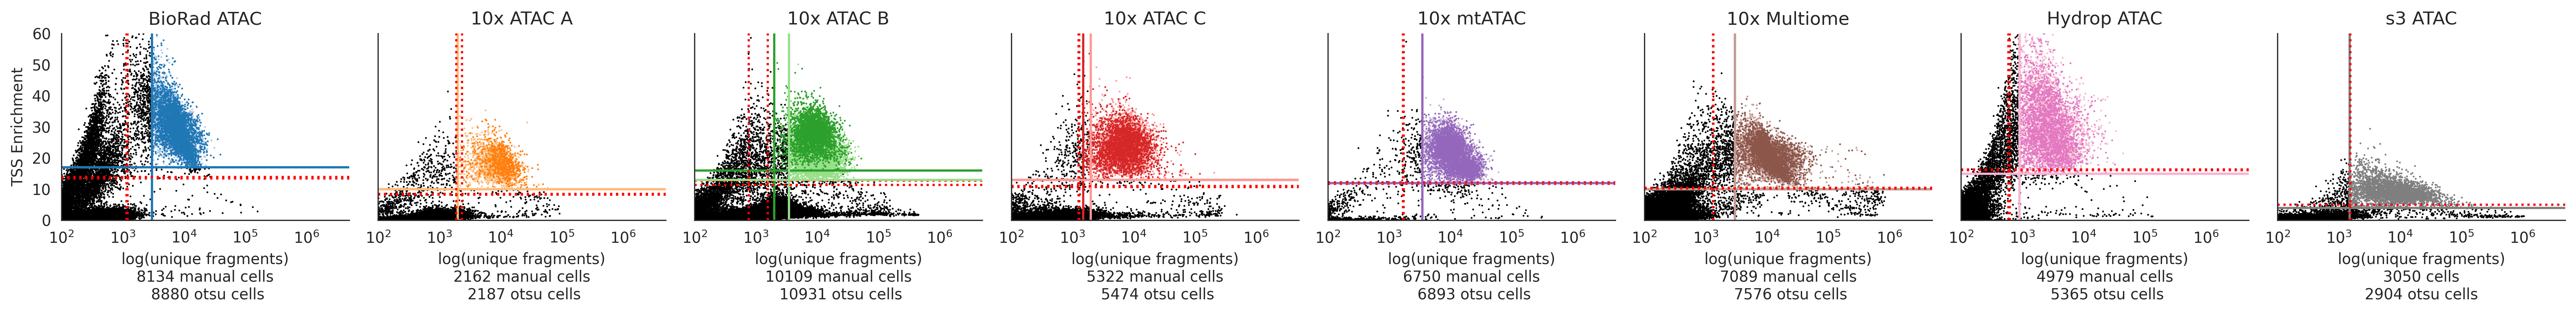

In [62]:
var_to_plot = ["TSS_enrichment"] #, "FRIP", "Dupl_rate"]
order =['BioRad ATAC',
 '10x ATAC A',
 '10x ATAC B',
 '10x ATAC C',
 '10x mtATAC',
 '10x Multiome',
 'Hydrop ATAC',
 's3 ATAC']

new_thr_dict = {
    'TSS_enrichment': {},
    'Unique_nr_frag': {}
}

new_thr_df = pd.DataFrame(index=alias_dict.keys(), columns='Unique_nr_frag_old TSS_enrichment_old n_cells_old Unique_nr_frag_new TSS_enrichment_new n_cells_new'.split())

f, axes = plt.subplots(len(var_to_plot), len(order), figsize=(len(order)*3, len(var_to_plot)*3), sharex="col", sharey="row", dpi=300)
for tech in order:
    tech_index = order.index(tech)
    ax = axes[tech_index]
    print(f'{tech}, {tech_index}')
    for var in var_to_plot:
        var_index = var_to_plot.index(var)
        print(f'\t{var}, {var_index}')
        
        # plot scatter
        hue_order = reversed(sorted(list(metadata_bc_df[metadata_bc_df['tech'] == tech]["is_cell"].unique())))
        plot = sns.scatterplot(data=metadata_bc_df[metadata_bc_df['tech'] == tech].sort_values('is_cell', ascending=False), x="Unique_nr_frag", y=var, hue="is_cell", hue_order=hue_order, palette=color_alias_dict, s=1.5, linewidth=0, edgecolor=None, ax=ax)
        
        # draw cutoff lines, but only when the cutoff is defined
        if var in cutoff_dict.keys():
            for sample in metadata_bc_df[metadata_bc_df['tech'] == tech]['sample_id'].unique():
                metadata_bc_df_sub = metadata_bc_df[metadata_bc_df['sample_id'] == sample]
                
                ax.axvline(cutoff_dict["Unique_nr_frag"][sample], color=color_dict[sample])
                print(f'\t\tadding vline at {cutoff_dict["Unique_nr_frag"][sample]}')
                
                ax.axhline(cutoff_dict[var][sample], color=color_dict[sample])
                print(f'\t\tadding hline at {cutoff_dict[var][sample]}')
                
                x_arr = np.array(metadata_bc_df_sub['Log_unique_nr_frag'])
                # x_percentile_cutoff = np.percentile(x_arr, 99)
                # x_arr_cutoff = x_arr[x_arr < percentile_cutoff]
                x_arr_cutoff = x_arr
                x_threshold = threshold_otsu(x_arr_cutoff, 5000)
                x_threshold = 10**x_threshold
                
                new_thr_df['Unique_nr_frag_new'].loc[sample] = x_threshold
                new_thr_df['Unique_nr_frag_old'].loc[sample] = cutoff_dict['Unique_nr_frag'][sample]

                y_arr = np.array(metadata_bc_df_sub[var])
                y_percentile_cutoff = np.percentile(y_arr, 99)
                y_arr_cutoff = y_arr[y_arr < y_percentile_cutoff]
                y_threshold = threshold_otsu(y_arr_cutoff, 5000)
                
                # fill in df
                new_thr_df['TSS_enrichment_new'].loc[sample] = y_threshold
                new_thr_df['TSS_enrichment_old'].loc[sample] = cutoff_dict['TSS_enrichment'][sample]
                
                # add new and old cellcounts to df
                new_thr_df['n_cells_old'].loc[sample] = metadata_bc_df_sub['is_cell'].value_counts().loc[alias_dict[sample]]
                counts = metadata_bc_df[metadata_bc_df['tech'] == tech]['is_cell'].value_counts()

                metadata_bc_df_sub['is_cell_new'] = alias_dict[sample]
                metadata_bc_df_sub.is_cell_new[metadata_bc_df_sub.TSS_enrichment <= y_threshold] = 'not_cell'
                metadata_bc_df_sub.is_cell_new[metadata_bc_df_sub.Unique_nr_frag <= x_threshold] = 'not_cell'
                new_thr_df['n_cells_new'].loc[sample] = len(metadata_bc_df_sub.loc[metadata_bc_df_sub['is_cell_new'] != 'not_cell'])

                # metadata_bc_dict[key].is_cell[metadata_bc_dict[key].Unique_nr_frag < params['call_cells']['filter_frags_lower'][key]] = 'none'
                
                metadata_bc_df[metadata_bc_df['sample_id'] == sample] = metadata_bc_df_sub
                
                print(f'\t\tnew thresholds at {x_threshold}, {y_threshold}')

                ax.axvline(x_threshold, color='r', linestyle=':')
                ax.axhline(y_threshold, color='r', linestyle=':')
        
        # plot settings
        plot.set(xscale="log")
        ax.set_xlim([100, x_max])
        ax.set_ylim(ylim_dict[var])
        ax.get_legend().remove()
        sns.despine(top=True, right=True, left=False, bottom=False, ax=ax)

        if var_index == 0:
            plot.set_title(tech)
        
        if tech_index == 0:
            plot.set_ylabel(ylabel_dict[var])
        
        # add subtitle with cell counts
        counts = metadata_bc_df[metadata_bc_df['tech'] == tech]['is_cell'].value_counts()
        counts_otsu = metadata_bc_df[metadata_bc_df['tech'] == tech]['is_cell_new'].value_counts()

        idx = sorted(counts.index)
        if var == var_to_plot[-1]:
            if tech == 's3 ATAC':
                plot.set_xlabel(f'log(unique fragments)\n{counts[idx[1]]} cells\n{counts_otsu[idx[1]]} otsu cells', y=-0.01)
            else:
                plot.set_xlabel(f'log(unique fragments)\n{counts[idx[0]] + counts[idx[1]]} manual cells\n {counts_otsu[idx[0]] + counts_otsu[idx[1]]} otsu cells', y=-0.01)
            
    print('\n')

print('saving figure...')
f.tight_layout()
f.savefig('plts_pub/libds_scatterplots_compound_logfrag_OTSU.png', dpi=300, transparent=False, facecolor='white')


In [46]:
new_thr_df

,Unique_nr_frag_old,TSS_enrichment_old,n_cells_old,Unique_nr_frag_new,TSS_enrichment_new,n_cells_new
Broad_1,3000,17,4147,1194.728858,13.940448,4485
Broad_2,3000,17,3987,1161.221198,13.397135,4395
Stanford_1,2000,10,756,2349.796329,8.449645,755
Stanford_2,2000,10,1406,1901.193057,8.26537,1432
VIB_1,2000,16,2827,1572.833824,12.798065,2861
VIB_2,3500,13,7282,770.641934,11.420866,8070
CNAG_1,1500,13,2660,1292.784615,10.717506,2721
CNAG_2,2000,13,2662,1265.054245,11.017936,2753
Broad_mito_1,3500,12,3466,1679.922831,12.180196,3533
Broad_mito_2,3500,12,3284,1739.151281,11.705448,3360
